In [31]:
import os
import pickle

import matplotlib.pyplot as plt

In [32]:
NORMALIZER_NAME = "gas_t_student"
DL_MODEL_LIBRARY = "gluonts"
DATASET_NAME = "seasonal"

multivariate = "_multivariate"   # "_multivariate" if its multivariate, empty otherwise

ROOT_FOLDER = f"../RESULTS_STRENGTHS_{DATASET_NAME}_{NORMALIZER_NAME}_{DL_MODEL_LIBRARY}" + multivariate

strengths = [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.49, 0.499, 0.5]

Get results

In [33]:
means = []
params = []
for strength in strengths:

    folder = os.path.join(ROOT_FOLDER, f"STRENGTH_{strength}")
    
    normalizer_folder = os.path.join(folder, NORMALIZER_NAME)
    init_params_norm_filename = os.path.join(normalizer_folder, 'init_params.json')
    ###
    means_folder = os.path.join(normalizer_folder, 'means')
    test_means_folder = os.path.join(means_folder, 'test')
    vars_folder = os.path.join(normalizer_folder, 'vars')
    test_vars_folder = os.path.join(vars_folder, 'test')
    norm_ts_folder = os.path.join(normalizer_folder, 'normalized_ts')
    test_norm_ts_folder = os.path.join(norm_ts_folder, 'test')
    params_folder = os.path.join(normalizer_folder, 'normalizer_params')
    test_params_folder = os.path.join(params_folder, 'test')

    test_means = []
    for i in range(len(os.listdir(test_means_folder))):
        with open(os.path.join(test_means_folder, f'ts_{i}.pkl'), 'rb') as f:
            test_means.append(pickle.load(f))
    test_params = []
    for i in range(len(os.listdir(test_params_folder))):
        with open(os.path.join(test_params_folder, f'ts_{i}.pkl'), 'rb') as f:
            test_params.append(pickle.load(f))

    means.append(test_means)
    params.append(test_params)

len(means), len(means[0]), means[0][0].shape

(9, 1, (110, 10))

Get dataset

In [34]:
with open(os.path.join(folder, f'test_dataset.pkl'), 'rb') as f:
    dataset = pickle.load(f)
test_dataset = [el["target"] for el in dataset]

len(test_dataset), type(test_dataset[0]), test_dataset[0].shape

(1, numpy.ndarray, (10, 110))

Parameters

In [35]:
for par, strength in zip(params, strengths):
    print(f"Parameters for strength: {strength}")
    for ts_ind in range(len(par)):
        print(f"TS {ts_ind}")
        print(f"Mean 0: {par[0][0][ts_ind]}")
        print(f"Var 0: {par[0][1][ts_ind]}")
        print(f"Alpha mean: {par[0][2][ts_ind]}")
        print(f"Alpha var: {par[0][3][ts_ind]}")
        print(f"Beta mean: {par[0][4][ts_ind]}")
        print(f"Beta var: {par[0][5][ts_ind]}")
        print(f"Gamma mean: {par[0][6][ts_ind]}")
        print(f"Gamma var: {par[0][7][ts_ind]}")
        print(f"Nu: {par[0][8][ts_ind]}")

Parameters for strength: 0.001
TS 0
Mean 0: 1.5776840724775063
Var 0: 0.5943375504928051
Alpha mean: 0.999999
Alpha var: 0.999999
Beta mean: 0.8407644410901056
Beta var: 0.6987671085960545
Gamma mean: 0.07003840051915664
Gamma var: 0.04062524094969302
Nu: 50.0
Parameters for strength: 0.01
TS 0
Mean 0: 1.6055332932656075
Var 0: 0.6218459771683491
Alpha mean: 0.999999
Alpha var: 0.999999
Beta mean: 0.8373137341851976
Beta var: 0.6905641976428654
Gamma mean: 0.0727202489678611
Gamma var: 0.04086425032652351
Nu: 50.0
Parameters for strength: 0.1
TS 0
Mean 0: 1.522778842015115
Var 0: 0.020196678445146093
Alpha mean: 0.999999
Alpha var: 0.999999
Beta mean: 0.8310739162860975
Beta var: 0.6255546663687069
Gamma mean: 0.08645047135747558
Gamma var: 0.04070288795242449
Nu: 50.0
Parameters for strength: 0.2
TS 0
Mean 0: 1.3484200368787882
Var 0: 0.013137426474153908
Alpha mean: 0.999999
Alpha var: 0.8768173607805116
Beta mean: 0.847655276885171
Beta var: 0.5283101535777692
Gamma mean: 0.08079004

Plots

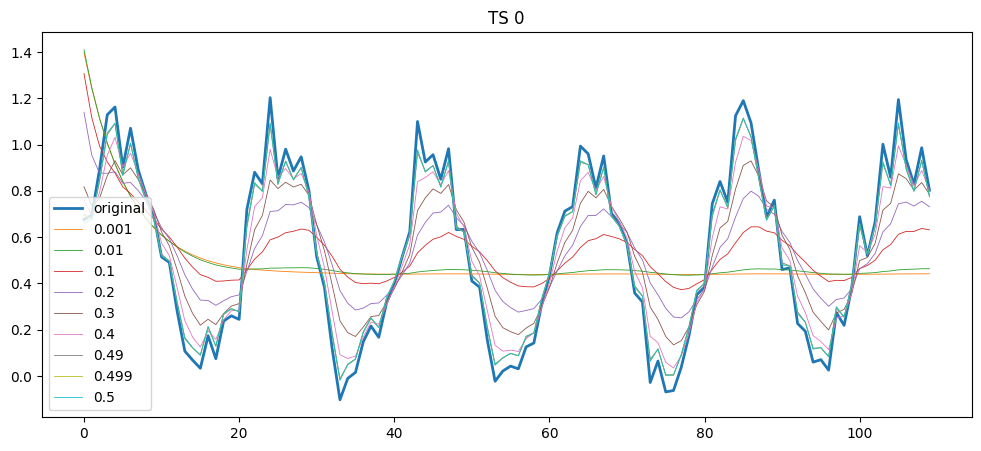

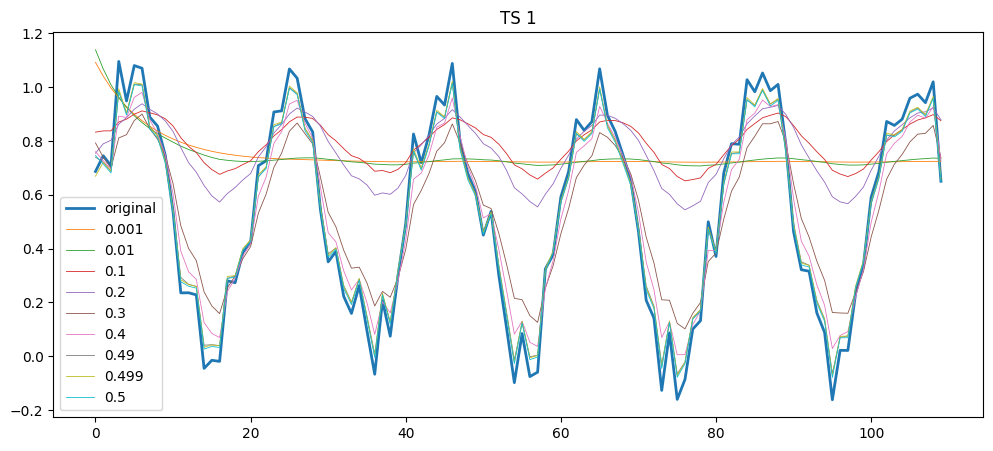

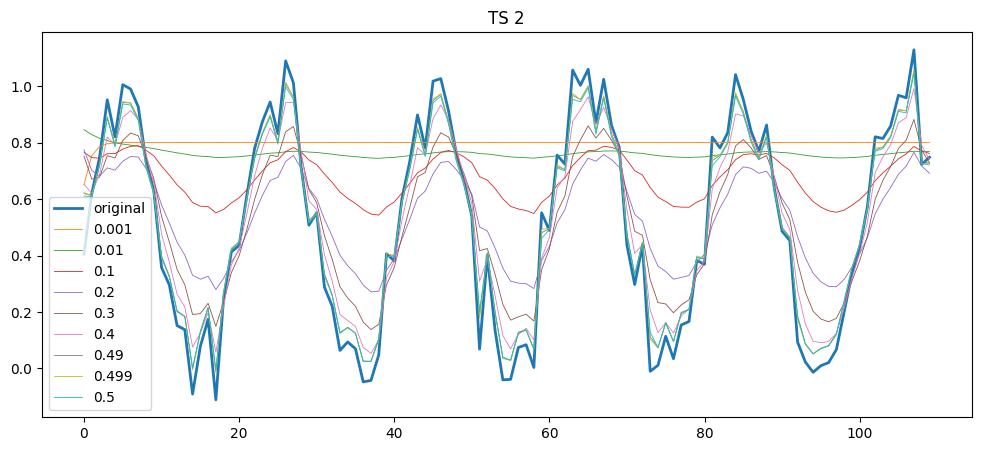

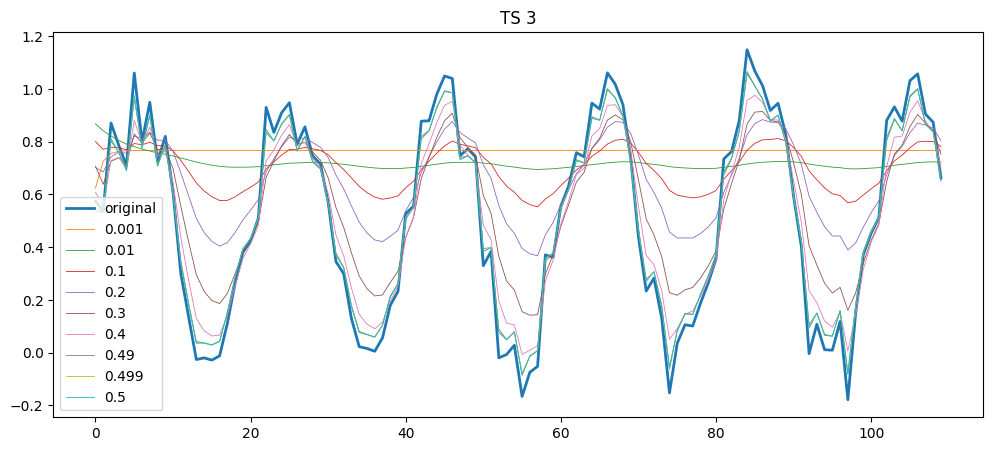

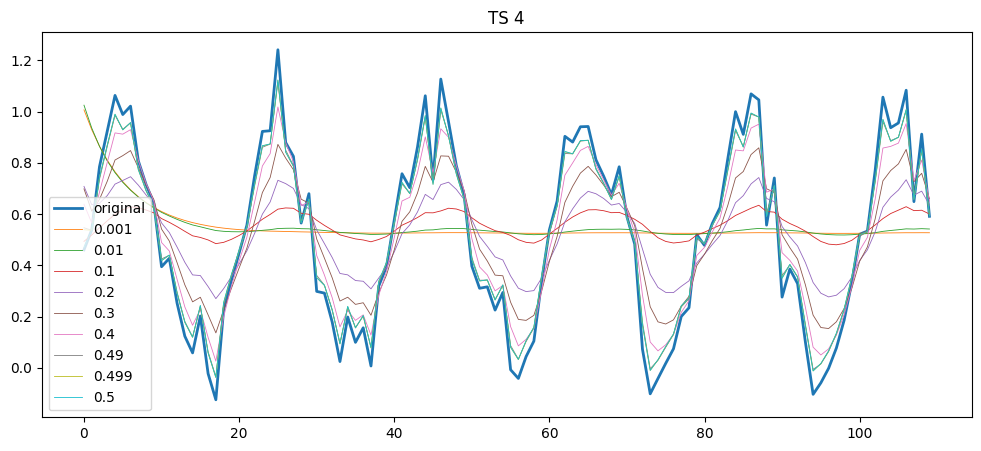

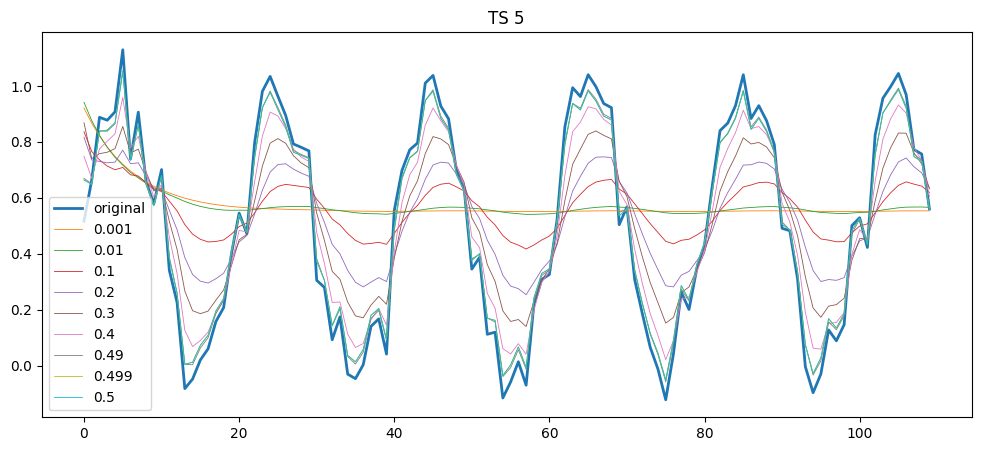

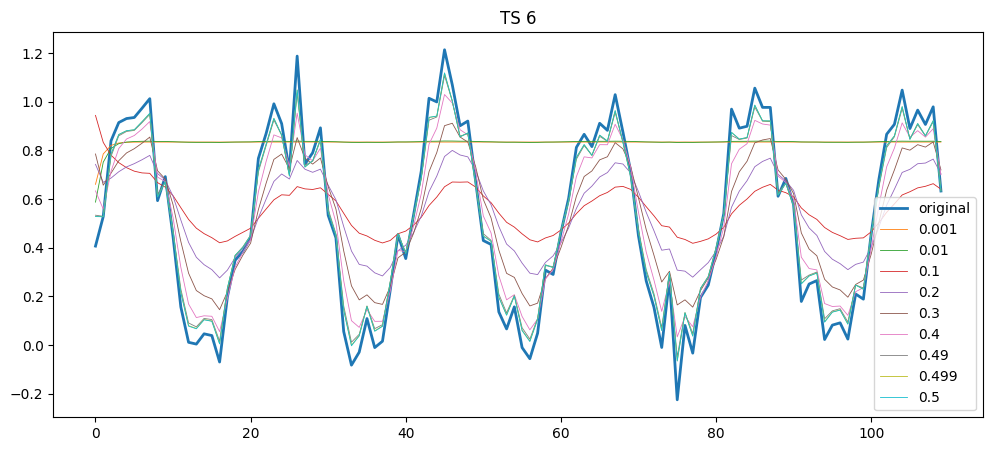

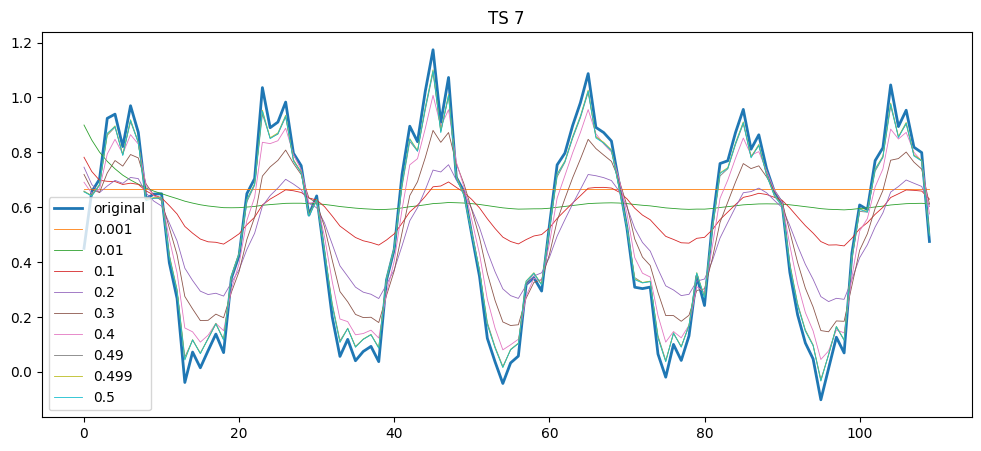

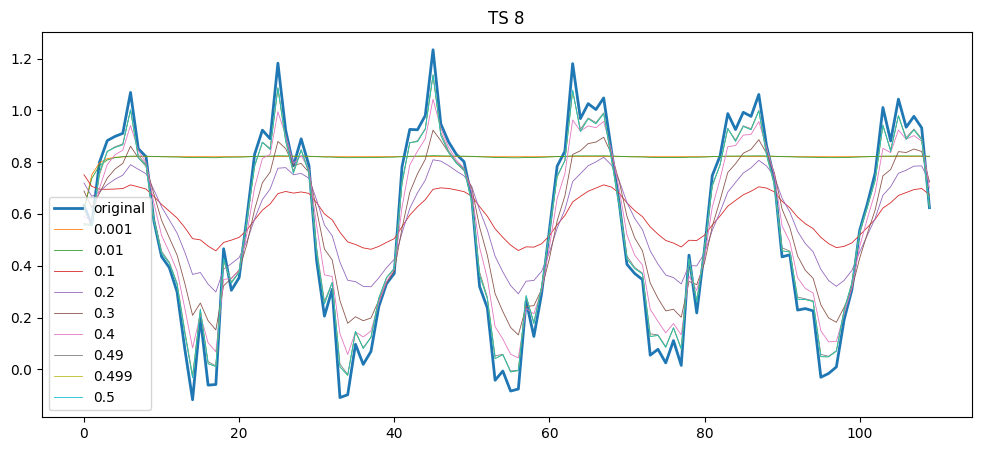

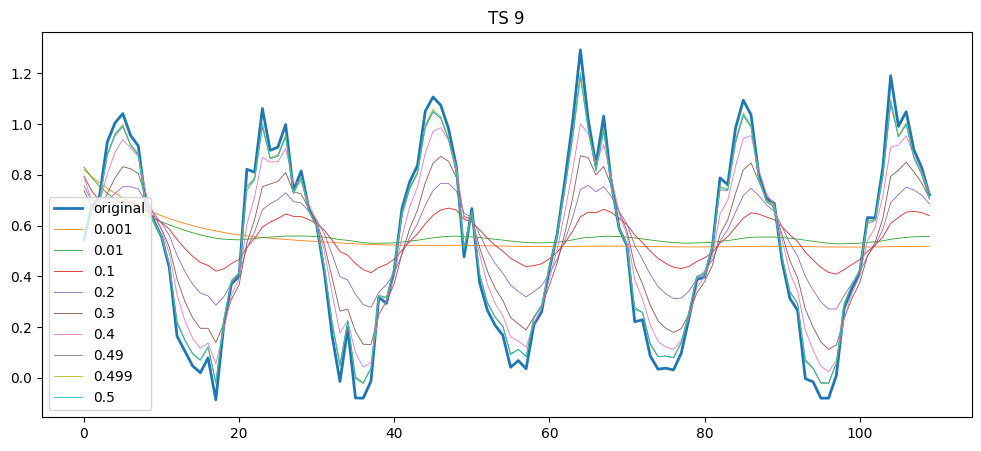

In [36]:
for ts_index in range(min(50, test_dataset[0].shape[0])):

    plt.figure(figsize=(12, 5))
    plt.plot(test_dataset[0][ts_index], label="original", linewidth=2)
    for mean, strength in zip(means, strengths):
        plt.plot(mean[0][:, ts_index], label=strength, linewidth=0.6)  # mean is a list with one multivariate time series
    plt.legend()
    plt.title(f'TS {ts_index}')
    plt.show()